# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Inicialização

In [2]:
# Carregando todas as bibliotecas
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mt
from math import factorial


## Carregue os dados

In [3]:
# Carregue os arquivos de dados em diferentes DataFrames

calls_df = pd.read_csv("/datasets/megaline_calls.csv")
internet_df = pd.read_csv("/datasets/megaline_internet.csv")
messages_df = pd.read_csv("/datasets/megaline_messages.csv")
plans_df = pd.read_csv("/datasets/megaline_plans.csv")
users_df = pd.read_csv("/datasets/megaline_users.csv")

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [4]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprima uma amostra de dados dos planos

print(plans_df)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

##### A princício, o DF não apresenta problemas óbvios, como ausentes, ou inadequados

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [6]:
### Acredito ser interessante adcionar 2 colunas com a informação sobre o formato dos dados da colunas usd_per_gb e mb_per_month_include
plans_df['mb_per_month_included_type'] = ['MB', 'MB']
plans_df['usd_per_gb_type'] = ['GB', 'GB']
print(plans_df)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

  mb_per_month_included_type usd_per_gb_type  
0                         MB              GB  
1                         MB              GB  


## Usuários

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprima uma amostra de dados dos usuários

print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [9]:
###Corrigindo a coluna churn_date, dados ausentes (plano ativo):

users_df['churn_date'] = users_df['churn_date'].fillna('2099')
print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate       2099  
1  2018-08-13      surf       2099  
2  2018-10-21      surf       2099  
3  2018-01-28      surf       2099  
4  2018-05-23      surf       2099  


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

##### Acredito que não há necessidade de adicionar nenhum dado ao dataframe em questão.

## Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprima uma amostra de dados das chamadas
print(calls_df.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

##### A principio não tem nenhum problema que precisa ser tratado neste DF.

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [12]:
#### Adcionar informação complementar a coluna "duration"
calls_df = calls_df.rename(columns={'duration': 'duration_min'})                  
print(calls_df.head())

         id  user_id   call_date  duration_min
0   1000_93     1000  2018-12-27          8.52
1  1000_145     1000  2018-12-27         13.66
2  1000_247     1000  2018-12-27         14.48
3  1000_309     1000  2018-12-28          5.76
4  1000_380     1000  2018-12-30          4.22


## Mensagens

In [13]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprima uma amostra dos dados das mensagens

print(messages_df.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

##### A principio DF sem nenhum problema para ser tratado.

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

##### Nenhuma informação adicional para ser incluída no DF

## Internet

In [15]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet_df.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

##### A principio DF sem nenhum problema para ser tratado.

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

##### Nenhuma informação adicional para ser incluída no DF

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [17]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print(plans_df.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

  mb_per_month_included_type usd_per_gb_type  
0                         MB              GB  
1                         MB              GB  


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [18]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
user_calls = calls_df.groupby('user_id')['call_date'].count()
print(user_calls)

user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: call_date, Length: 481, dtype: int64


In [19]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
users_min = calls_df.groupby('user_id')['duration_min'].sum()
print(users_min)


user_id
1000     116.83
1001    1640.46
1002     777.13
1003    1041.00
1004    2618.95
         ...   
1495    1666.41
1496    1376.21
1497     276.53
1498    3029.97
1499    1450.31
Name: duration_min, Length: 481, dtype: float64


In [20]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

user_message = messages_df.groupby('user_id')['message_date'].count()
print(user_message)


user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: message_date, Length: 402, dtype: int64


In [21]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.


user_web = internet_df.groupby('user_id')['mb_used'].sum()
print(user_web)


user_id
1000      1901.47
1001     80437.94
1002     40293.33
1003     27044.14
1004    156352.81
          ...    
1495     98890.96
1496     64268.64
1497     11106.55
1498    227525.13
1499     71350.23
Name: mb_used, Length: 489, dtype: float64


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [22]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
#DF:

user_dados = pd.concat([user_calls, users_min, user_message, user_web], axis = 1)
print(user_dados.head())



         call_date  duration_min  message_date    mb_used
user_id                                                  
1000          16.0        116.83          11.0    1901.47
1001         261.0       1640.46         207.0   80437.94
1002         113.0        777.13          88.0   40293.33
1003         149.0       1041.00          50.0   27044.14
1004         370.0       2618.95         177.0  156352.81


In [23]:
# Adicione as informações sobre o plano

#### Juntei os dados filtrados acima, com o DataFrame Users, para obter todas as informações sobre o planos

user_dados_2 = user_dados.merge(users_df, on= "user_id")
print(user_dados_2)

# pretendo filtrar os dois planos:
surf_balance = user_dados_2[user_dados_2["plan"] == "surf"]
ultimate_balance = user_dados_2[user_dados_2["plan"] == "ultimate"]
print(surf_balance.head())
print()
print(ultimate_balance.head())

# agora posso trabalhar com os dois planos separadamente.

     user_id  call_date  duration_min  message_date    mb_used first_name  \
0       1000       16.0        116.83          11.0    1901.47   Anamaria   
1       1001      261.0       1640.46         207.0   80437.94     Mickey   
2       1002      113.0        777.13          88.0   40293.33     Carlee   
3       1003      149.0       1041.00          50.0   27044.14   Reynaldo   
4       1004      370.0       2618.95         177.0  156352.81    Leonila   
..       ...        ...           ...           ...        ...        ...   
485     1495      253.0       1666.41           NaN   98890.96      Fidel   
486     1496      195.0       1376.21          65.0   64268.64      Ariel   
487     1497       54.0        276.53          50.0   11106.55      Donte   
488     1498      451.0       3029.97           NaN  227525.13       Scot   
489     1499      204.0       1450.31           NaN   71350.23      Shena   

      last_name  age                                       city    reg_date

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [24]:
# Calcule a receita mensal para cada usuário

#PLANO SURF!!!!!

#calculo de usuario mês:
#Quantidade de minutos(mês) = duration_min 
#Quantidade de mensagens(mês) = message_date
#Quantidade de dados MB(mês) = mb_used

#usar ciclo for para calcular acrescimos: plano surf = mês: $20, 500 min, 50 msg, 15Gb dados,
#acrecimos: $0.03 (min.), $0.03 (msg), $10.00 (gb) 


#eliminando NaN, convertendo colunas para float, e numeric:

surf_balance = surf_balance.fillna(0)
columns_to_convert = ['duration_min', 'message_date', 'mb_used']
surf_balance[columns_to_convert] = surf_balance[columns_to_convert].astype(float)
surf_balance['duration_min'] = pd.to_numeric(surf_balance['duration_min'], errors='coerce')
surf_balance['message_date'] = pd.to_numeric(surf_balance['message_date'], errors='coerce')
surf_balance['mb_used'] = pd.to_numeric(surf_balance['mb_used'], errors='coerce')

In [25]:
### função para calcular os acréscimos para os minutos passados, msg passadas, e GB passados além do plano:
def calculate_additional(row):
    min_add, msg_add, gb_add = 0, 0, 0
    if row['duration_min'] > 500.00:
        min_add = (row['duration_min'] - 500.00) * 0.03
    if row['message_date'] > 50.00:
        msg_add = (row['message_date'] - 50) * 0.03
    if row['mb_used'] > 15360.00:
        gb_add = (row['mb_used'] - 15360.00) / 1024.00 * 10
    return pd.Series([min_add, msg_add, gb_add], index=['min_add', 'msg_add', 'gb_add'])
                     
surf_balance[['min_add', 'msg_add', 'gb_add']] = surf_balance.apply(calculate_additional, axis=1)

print(surf_balance)

     user_id  call_date  duration_min  message_date    mb_used first_name  \
1       1001      261.0       1640.46         207.0   80437.94     Mickey   
2       1002      113.0        777.13          88.0   40293.33     Carlee   
3       1003      149.0       1041.00          50.0   27044.14   Reynaldo   
4       1004      370.0       2618.95         177.0  156352.81    Leonila   
5       1005       59.0        470.22          11.0   17140.17      Livia   
..       ...        ...           ...           ...        ...        ...   
484     1494      420.0       2672.66         174.0   91389.19    Preston   
485     1495      253.0       1666.41           0.0   98890.96      Fidel   
486     1496      195.0       1376.21          65.0   64268.64      Ariel   
488     1498      451.0       3029.97           0.0  227525.13       Scot   
489     1499      204.0       1450.31           0.0   71350.23      Shena   

      last_name  age                                       city    reg_date

In [26]:
####Soma total para cada usuário do plano Surf:

surf_balance['user_total'] = surf_balance['min_add'] + surf_balance['msg_add'] + surf_balance['gb_add'] + 20.00

print(surf_balance)

     user_id  call_date  duration_min  message_date    mb_used first_name  \
1       1001      261.0       1640.46         207.0   80437.94     Mickey   
2       1002      113.0        777.13          88.0   40293.33     Carlee   
3       1003      149.0       1041.00          50.0   27044.14   Reynaldo   
4       1004      370.0       2618.95         177.0  156352.81    Leonila   
5       1005       59.0        470.22          11.0   17140.17      Livia   
..       ...        ...           ...           ...        ...        ...   
484     1494      420.0       2672.66         174.0   91389.19    Preston   
485     1495      253.0       1666.41           0.0   98890.96      Fidel   
486     1496      195.0       1376.21          65.0   64268.64      Ariel   
488     1498      451.0       3029.97           0.0  227525.13       Scot   
489     1499      204.0       1450.31           0.0   71350.23      Shena   

      last_name  age                                       city    reg_date

#### (acima) Total gasto por cada usuário do plano surf na coluna 'user_total'

In [27]:
# Calcule a receita mensal para cada usuário

#PLANO ULTIMATE!!!!!

#calculo de usuario mês:
#Quantidade de minutos(mês) = duration_min 
#Quantidade de mensagens(mês) = message_date
#Quantidade de dados MB(mês) = mb_used

#usar ciclo for para calcular acrescimos: plano ultimate = mês: $70, 3000 min, 1000 msg, 30Gb dados,
#acrecimos: $0.01 (min.), $0.01 (msg), $7.00 (gb) 


#eliminando NaN, convertendo colunas para float, e numeric:
ultimate_balance = ultimate_balance.fillna(0)
columns_to_convert1 = ['duration_min', 'message_date', 'mb_used']
ultimate_balance[columns_to_convert1] = ultimate_balance[columns_to_convert1].astype(float)
ultimate_balance['duration_min'] = pd.to_numeric(ultimate_balance['duration_min'], errors='coerce')
ultimate_balance['message_date'] = pd.to_numeric(ultimate_balance['message_date'], errors='coerce')
ultimate_balance['mb_used'] = pd.to_numeric(ultimate_balance['mb_used'], errors='coerce')

In [28]:
### função para calcular os acréscimos para os minutos passados, msg passadas, e GB passados além do plano:
def calculate_additional_1(row):
    min_add, msg_add, gb_add = 0, 0, 0
    if row['duration_min'] > 3000.00:
        min_add = (row['duration_min'] - 3000.00) * 0.01
    if row['message_date'] > 1000.00:
        msg_add = (row['message_date'] - 1000) * 0.01
    if row['mb_used'] > 30720.00:
        gb_add = (row['mb_used'] - 30720.00) / 1024.00 * 7
    return pd.Series([min_add, msg_add, gb_add], index=['min_add', 'msg_add', 'gb_add'])
                     
ultimate_balance[['min_add', 'msg_add', 'gb_add']] = ultimate_balance.apply(calculate_additional_1, axis=1)

print(ultimate_balance)

     user_id  call_date  duration_min  message_date    mb_used first_name  \
0       1000       16.0        116.83          11.0    1901.47   Anamaria   
6       1006       11.0         64.11         154.0   34187.19     Jesusa   
8       1008      219.0       1473.31          84.0   55473.04      Emely   
11      1011      413.0       2744.87         371.0  131778.60     Halina   
13      1013       35.0        203.37          16.0   20113.92    Nicolas   
..       ...        ...           ...           ...        ...        ...   
472     1482      120.0        786.62          94.0   20806.13     Armand   
477     1487       56.0        392.71          66.0   13992.39      Elton   
480     1490      312.0       2123.33           0.0  190904.51      Shane   
483     1493      320.0       2197.37           0.0   76378.43     Cicely   
487     1497       54.0        276.53          50.0   11106.55      Donte   

    last_name  age                                       city    reg_date  

In [29]:
####Soma total para cada usuário do plano Ultimate:

ultimate_balance['user_total'] = ultimate_balance['min_add'] + ultimate_balance['msg_add'] + ultimate_balance['gb_add'] + 70.00

print(ultimate_balance)

     user_id  call_date  duration_min  message_date    mb_used first_name  \
0       1000       16.0        116.83          11.0    1901.47   Anamaria   
6       1006       11.0         64.11         154.0   34187.19     Jesusa   
8       1008      219.0       1473.31          84.0   55473.04      Emely   
11      1011      413.0       2744.87         371.0  131778.60     Halina   
13      1013       35.0        203.37          16.0   20113.92    Nicolas   
..       ...        ...           ...           ...        ...        ...   
472     1482      120.0        786.62          94.0   20806.13     Armand   
477     1487       56.0        392.71          66.0   13992.39      Elton   
480     1490      312.0       2123.33           0.0  190904.51      Shane   
483     1493      320.0       2197.37           0.0   76378.43     Cicely   
487     1497       54.0        276.53          50.0   11106.55      Donte   

    last_name  age                                       city    reg_date  

#### Total gasto por cada usuário do plano ultimate na coluna 'user_total'

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

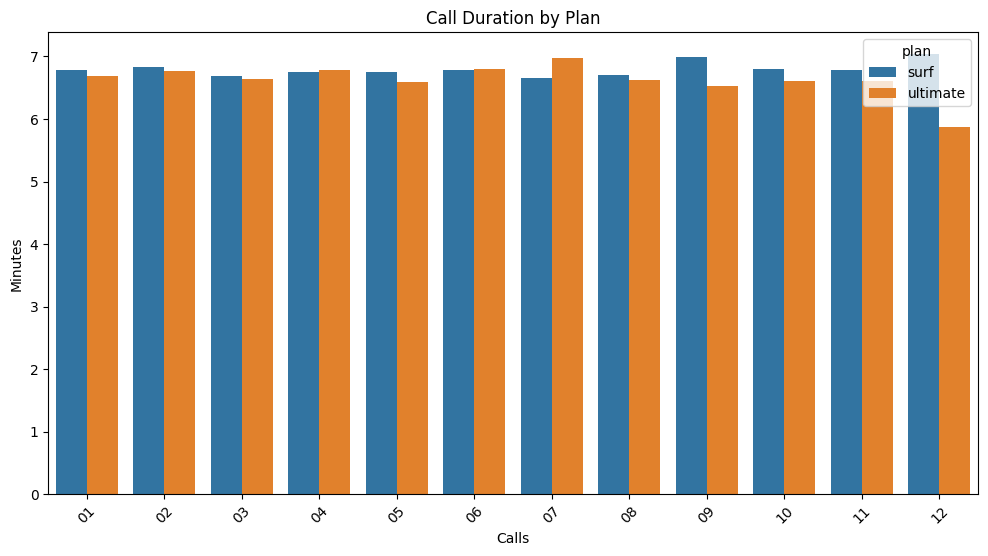

In [30]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
import matplotlib.pyplot as plt
import seaborn as sns

#juntando os dataframes calls e users e ajustando os dados da coluna 'call_date':
grafic_1 = users_df.merge(calls_df, on= "user_id")
grafic_1['mes'] = grafic_1['reg_date'].str[5:7]

#novo código com a sugestão:
grafic_1_bar = grafic_1.groupby(['mes', 'plan'])['duration_min'].mean().reset_index()
#grafico:
plt.figure(figsize=(12, 6))
sns.barplot(data= grafic_1_bar, x='mes', y='duration_min', hue='plan')
plt.xticks(rotation=45)
plt.xlabel('Calls')
plt.ylabel('Minutes')
plt.title('Call Duration by Plan')
plt.show()



#### Resposta do Aluno: Em termos de minutos gastos em chamadas, ambos os planos tem uma duração aproximada!

In [31]:
surf_balance['mes'] = surf_balance['reg_date'].str[5:7]
ultimate_balance['mes'] = ultimate_balance['reg_date'].str[5:7]


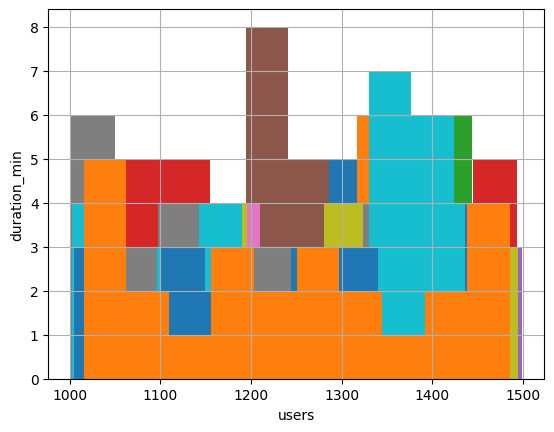

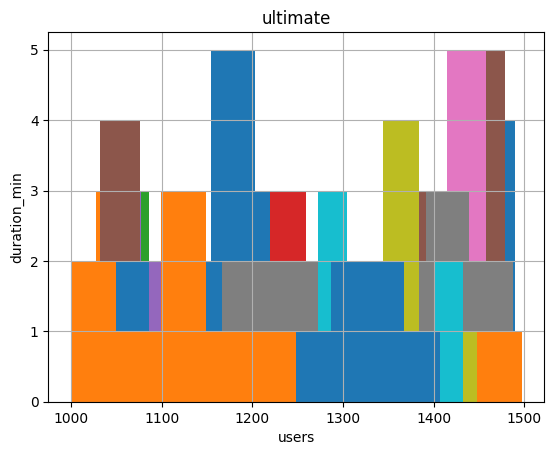

In [32]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
hist_surf = surf_balance.groupby('mes')['user_id'].hist()
plt.xlabel("users")
plt.ylabel("duration_min")
plt.show()

hist_ultimate = ultimate_balance.groupby('mes')['user_id'].hist()
plt.xlabel("users")
plt.ylabel("duration_min")
plt.title('ultimate')
plt.show()

#### Resposta do Aluno: Acima dois histogramas criados para os dois planos. Observa-se uma variação de comportamento, onde certos grupos de usuários têm maiores valores de minutos acumulados ou mais contribuições em comparação a outros. Por exemplo: A região entre 1200 e 1400 (surf) usuários parece ter uma maior concentração de duração acumulada, indicando um comportamento de uso mais intenso nesse intervalo.

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [33]:
# Calcule a média e a variância da duração mensal das chamadas
print('a média de minutos do plano Surf é:', surf_balance['duration_min'].mean()/12)
print('a variancia do plano Surf é : ', surf_balance['duration_min'].var()/12)
print()
print('a média de minutos do plano Ultimate é: ', ultimate_balance['duration_min'].mean()/12)
print('a variancia do plano Ultimate é: ', ultimate_balance['duration_min'].var()/12)


a média de minutos do plano Surf é: 159.33214214214215
a variancia do plano Surf é :  219673.95692935734

a média de minutos do plano Ultimate é:  155.23302547770695
a variancia do plano Ultimate é:  214355.90353721005


159.33214214214215
155.23302547770695


<AxesSubplot:xlabel='duration_min'>

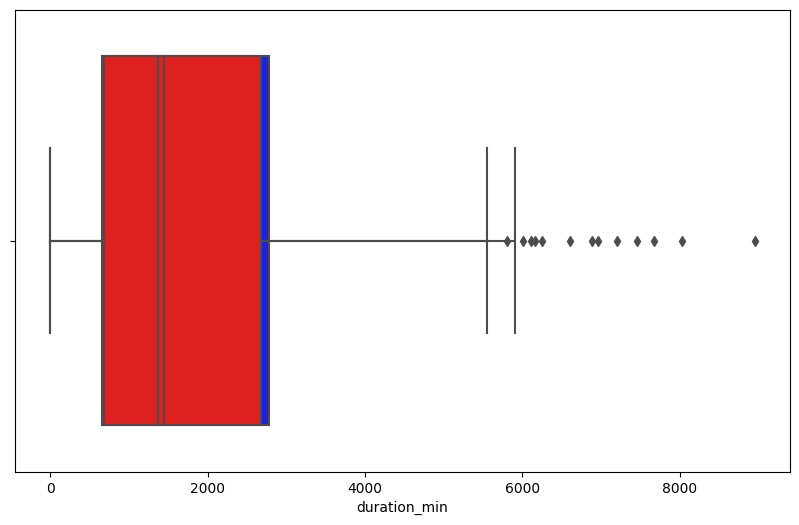

In [34]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
import seaborn as sns

surf_mean = surf_balance['duration_min'].mean()/12
ultimate_mean = ultimate_balance['duration_min'].mean()/12
print(surf_mean)
print(ultimate_mean)

plt.figure(figsize=(10, 6))
sns.boxplot(x=surf_balance['duration_min'], color='blue')
sns.boxplot(x=ultimate_balance['duration_min'], color='red')

#### Resposta do aluno: A maior parte dos dados está concentrada entre os limites do box 25º e 75º percentis (duração chamada). Existem valores significativamente acima do limite superior (marcados como pontos). Esses são os outliers e representam usuários com durações de chamadas muito acima do esperado. A linha no centro do box representa a mediana da duração das chamadas. Ela está mais próxima do limite inferior do box. Os limites inferior e superior (as extremidades dos "bigodes") representam o alcance dos dados sem considerar os outliers. 

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

### Mensagens

In [35]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

surf_msg = surf_balance['message_date'].count()
ultimate_msg = ultimate_balance['message_date'].count()
print(' Os usuarios do plano surf costumam enviar: ', surf_msg, 'mensagens por mês')
print(' Os usuarios do plano ultimate costumam enviar: ', ultimate_msg, 'mensagens por mês')

 Os usuarios do plano surf costumam enviar:  333 mensagens por mês
 Os usuarios do plano ultimate costumam enviar:  157 mensagens por mês


In [36]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

surf_web = surf_balance['mb_used'].mean()
ultimate_web = ultimate_balance['mb_used'].mean()
print(' Os usuarios do plano surf costumam usar: ', surf_web, 'Megas por plano')
print(' Os usuarios do plano ultimate costumam usar: ', ultimate_web, 'Megas por plano')

 Os usuarios do plano surf costumam usar:  78216.75654654654 Megas por plano
 Os usuarios do plano ultimate costumam usar:  78946.39350318469 Megas por plano


[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

### Internet

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

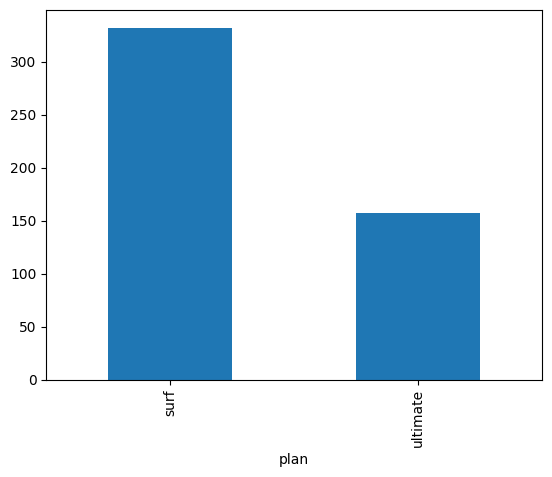

In [37]:
import matplotlib.pyplot as plt
user_internet = user_dados_2.groupby('plan')['mb_used'].count().plot(kind= 'bar')

#### Resultado: o fluxo de internet é muito maior no plano Surf, tanto é que como a maioria dos clientes ultrapassa os 15GB, e devido a taxa.. podemos ver abaixo ele se torna muito mais lucrativo para a companhia.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [38]:
surf_balance_total = surf_balance['user_total'].sum()
ultimate_balance_total = ultimate_balance['user_total'].sum()
print('O realizado do plano Surf é: ', surf_balance_total)
print()
print('O realizado no plano Ultimate é: ', ultimate_balance_total)

O realizado do plano Surf é:  229175.7800796875

O realizado no plano Ultimate é:  67305.14003945312


### Resposta: Como podemos ver o Plano Surf traz maior lucratividade a companhia!!

[Formule conclusões sobre como a receita difere entre os planos.]

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [42]:
surf_balance['user_total'].isna().sum()

0

In [43]:
ultimate_balance['user_total'].isna().sum()

0

In [49]:
# Teste as hipóteses, definindo as hipóteses:

#Hipótese Nula = receitas média de ambos os planos são iguais.
#Hipótese Alternativa = receitas médias de ambos os planos são diferentes.

#importando biblioteca:
from scipy import stats as st

#convertendo dados para evitar qualquer erros:
surf_balance['user_total'] = pd.to_numeric(surf_balance['user_total'], errors='coerce').dropna()
ultimate_balance['user_total'] = pd.to_numeric(ultimate_balance['user_total'], errors='coerce').dropna()
surf_balance['user_total'] = surf_balance['user_total'].astype(int)
ultimate_balance['user_total'] = ultimate_balance['user_total'].astype(int)

#teste:
teste_surf = surf_balance['user_total']
teste_ultimate = ultimate_balance['user_total']
alpha = 0.05
results = st.ttest_ind(teste_surf, teste_ultimate, equal_var = False)
print('valor-p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rejeitamos a hipóteses Nula")
else:
    print("Não podemos rejeitar a hipótese Nula")

    #conferindo a variancia:
var_surf = pd.Series(teste_surf).var()
var_ultimate = pd.Series(teste_ultimate).var()
print(var_surf)
print(var_ultimate)

valor-p:  1.3101137069058406e-07
Rejeitamos a hipóteses Nula
375835.7087267991
189092.3040176384


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [55]:
# Teste as hipóteses

#Hipótese Nula: NY_NJ tem a receite média igual as demais regiões.
#Hipótese Alternativa: NY_NJ tem a receita maior ou menor as demais regiões.

#Extrair listas
test_surf_NY = []
test_surf_Other = []

for index, row in surf_balance.iterrows():
    if row['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        test_surf_NY.append(row)
    else:
        test_surf_Other.append(row)
        
#converter as listas para DF:
test_surf_NY_df = pd.DataFrame(test_surf_NY)
test_surf_Other_df = pd.DataFrame(test_surf_Other)

#Conversão do tipo de dado dos DF recém elaborados:
test_surf_NY_df['user_total'] = pd.to_numeric(test_surf_NY_df['user_total'], errors='coerce').dropna()
test_surf_Other_df['user_total'] = pd.to_numeric(test_surf_Other_df['user_total'], errors='coerce').dropna()
test_surf_NY_df['user_total'] = test_surf_NY_df['user_total'].astype(int)
test_surf_Other_df['user_total'] = test_surf_Other_df['user_total'].astype(int) 

#teste de Hipótese
teste_surf_NY = test_surf_NY_df['user_total']
teste_surf_Other = test_surf_Other_df['user_total']              
alpha = 0.05
results = st.ttest_ind(teste_surf_NY, teste_surf_Other, equal_var= False)
print('valor-p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rejeitamos a hipóteses Nula")
else:
    print("Não podemos rejeitas a hipótese Nula")

#conferindo a variancia:
var_surf_1 = pd.Series(teste_surf_NY).var()
var_surf_2 = pd.Series(teste_surf_Other).var()
print('variância NY_NJ: ',var_surf_1)
print('variância demais localidades: ', var_surf_2)


valor-p:  0.2235969193558584
Não podemos rejeitas a hipótese Nula
variância NY_NJ:  357693.0745762712
variância demais localidades:  379156.1380898513


In [54]:
### Agora para o plano ultimate:

# Teste as hipóteses
#Extrair listas
test_ultimate_NY = []
test_ultimate_Other = []

for index, row in ultimate_balance.iterrows():
    if row['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        test_ultimate_NY.append(row)
    else:
        test_ultimate_Other.append(row)
        
#converter para DF:
test_ultimate_NY_df = pd.DataFrame(test_ultimate_NY)
test_ultimate_Other_df = pd.DataFrame(test_ultimate_Other)

#Conversão do tipo de dado:
test_ultimate_NY_df['user_total'] = pd.to_numeric(test_ultimate_NY_df['user_total'], errors='coerce').dropna()
test_ultimate_Other_df['user_total'] = pd.to_numeric(test_ultimate_Other_df['user_total'], errors='coerce').dropna()
test_ultimate_NY_df['user_total'] = test_ultimate_NY_df['user_total'].astype(int)
test_ultimate_Other_df['user_total'] = test_ultimate_Other_df['user_total'].astype(int)

#teste
teste_ultimate_NY = test_ultimate_NY_df['user_total']
teste_ultimate_Other = test_ultimate_Other_df['user_total']              
alpha = 0.05
results = st.ttest_ind(teste_ultimate_NY, teste_ultimate_Other)
print('valor-p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rejeitamos a hipóteses Nula")
else:
    print("Não podemos rejeitas a hipótese Nula")
    
#conferindo a variancia:
var_ultimate_1 = pd.Series(teste_ultimate_NY).var()
var_ultimate_2 = pd.Series(teste_ultimate_Other).var()
print('variancia NY-NJ:', var_ultimate_1)
print('variancia demais localidades: ', var_ultimate_2)    

valor-p:  0.31520297112674317
Não podemos rejeitas a hipótese Nula
variancia NY-NJ: 216239.54385964907
variancia demais localidades:  185504.51073733208


In [45]:
surf_balance['city'].str.contains('NY-NJ')

1      False
2      False
3      False
4      False
5      False
       ...  
484     True
485     True
486    False
488     True
489    False
Name: city, Length: 333, dtype: bool

#### Resposta: 
#### Como podemos observar, foi realizado os testes considerando a hipótese nula, a região de NY-NJ ter a receita média igual as demais regiões.  E para ambos os testes com os diferentes planos, apontam que não devemos desconsiderar essa possibilidade.

## Conclusão: 
#### O volume de dados consumido pelos clientes do plano **Surf** ultrapassa frequentemente o limite do plano, gerando receitas adicionais significativas para a empresa.
- Apesar de o comportamento médio entre os usuários dos dois planos ser semelhante, o plano **Ultimate** apresenta maior custo-benefício para os clientes.
- A região **NY-NJ** não apresenta diferença significativa na receita média em comparação com outras regiões, com base nos testes realizados.

### Insights Relevantes:
1. O plano **Surf** gera mais receita para a empresa devido ao consumo de internet que frequentemente excede o limite do plano.
2. Para os clientes, o plano **Ultimate** seria mais vantajoso financeiramente, mas para a empresa, manter clientes no plano **Surf** é mais lucrativo.

#### Este projeto demonstrou que, enquanto os clientes do plano **Surf** poderiam se beneficiar de um upgrade para o plano **Ultimate**, a empresa Megaline obtém maior lucro quando os clientes permanecem no plano Surf devido às taxas de excedente.
